In [2]:
# 2024 서울시 상권 분석 서비스 (추정매출 - 상권) 데이터

# column: 기준 연도 + 분기 / 상권 구분 (ex.골목 상권, 발달 상권) / 서비스 업종 / 당월 매출 금액 / 당월 매출 건수/ 주중 매출 금액 (요일별 ) / 주말 매출 금액 (요일별)
# 시간대별 매출 금액 / 성별 매출 금액 / 연령대 매출 금액 / 주중 매출 건수 / 주말 매출 건수 / 요일별 매출 건수 / 시간대 매출 건수 / 연령대별 매출 건수 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
import os

plt.rcParams['font.family'] = 'Apple SD Gothic Neo'

df = pd.read_csv('서울시 상권분석서비스(추정매출-상권).csv',encoding="EUC-KR")

df.head()

,기준_년분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,당월_매출_금액,당월_매출_건수,주중_매출_금액,...,시간대_건수~21_매출_건수,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수
0,20243,A,골목상권,3110595,메디힐병원,CS200037,노래방,69063652,725,48394982,...,153,329,557,146,0,52,215,82,216,139
1,20243,A,골목상권,3110796,한림대학교한강성심병원,CS300010,반찬가게,239704725,774,239704725,...,0,0,516,258,0,516,0,0,0,258
2,20243,A,골목상권,3110162,군자역 4번,CS300011,일반의류,32685417,455,25601345,...,167,0,28,427,0,121,0,112,139,83
3,20243,A,골목상권,3110925,서초중학교,CS300011,일반의류,57053572,201,32544643,...,0,0,0,201,0,0,0,161,40,0
4,20243,D,발달상권,3120113,오목교역,CS300019,의료기기,143000000,55,143000000,...,0,0,0,55,0,0,0,0,0,55


In [3]:
# 결측치 확인

print(df.isnull().sum())

기준_년분기_코드          0
상권_구분_코드           0
상권_구분_코드_명         0
상권_코드              0
상권_코드_명            0
서비스_업종_코드          0
서비스_업종_코드_명        0
당월_매출_금액           0
당월_매출_건수           0
주중_매출_금액           0
주말_매출_금액           0
월요일_매출_금액          0
화요일_매출_금액          0
수요일_매출_금액          0
목요일_매출_금액          0
금요일_매출_금액          0
토요일_매출_금액          0
일요일_매출_금액          0
시간대_00~06_매출_금액    0
시간대_06~11_매출_금액    0
시간대_11~14_매출_금액    0
시간대_14~17_매출_금액    0
시간대_17~21_매출_금액    0
시간대_21~24_매출_금액    0
남성_매출_금액           0
여성_매출_금액           0
연령대_10_매출_금액       0
연령대_20_매출_금액       0
연령대_30_매출_금액       0
연령대_40_매출_금액       0
연령대_50_매출_금액       0
연령대_60_이상_매출_금액    0
주중_매출_건수           0
주말_매출_건수           0
월요일_매출_건수          0
화요일_매출_건수          0
수요일_매출_건수          0
목요일_매출_건수          0
금요일_매출_건수          0
토요일_매출_건수          0
일요일_매출_건수          0
시간대_건수~06_매출_건수    0
시간대_건수~11_매출_건수    0
시간대_건수~14_매출_건수    0
시간대_건수~17_매출_건수    0
시간대_건수~21_매출_건수    0
시간대_건수~24_매출_건수    0
남성_매출_건수     

In [4]:
df['상권_구분_코드_명'].unique()

# 상권 유형은 골목상권, 발달상권, 전통시장, 관광특구가 있음

array(['골목상권', '발달상권', '전통시장', '관광특구'], dtype=object)

In [5]:
df['상권_구분_코드_명'].value_counts()

# 골목상권이 제일 많음

상권_구분_코드_명
골목상권    43950
발달상권    29303
전통시장    12933
관광특구      993
Name: count, dtype: int64

In [6]:
df['서비스_업종_코드_명'].unique()

array(['노래방', '반찬가게', '일반의류', '의료기기', '화장품', '운동/경기용품', '섬유제품', '애완동물',
       '미용실', '피부관리실', '화초', '가구', '가전제품', '인테리어', '미곡판매', '커피-음료',
       '스포츠 강습', '육류판매', '신발', '조명용품', '예술학원', '세탁소', '시계및귀금속', '편의점',
       '컴퓨터및주변장치판매', '핸드폰', '서적', '네일숍', '가방', '철물점', '문구', '패스트푸드점',
       '전자상거래업', '일반교습학원', '스포츠클럽', '청과상', '호프-간이주점', '여관', '한의원', '당구장',
       '일식음식점', '골프연습장', '가전제품수리', '외국어학원', '자동차수리', '부동산중개업', '분식전문점',
       '자동차미용', '중식음식점', '자전거 및 기타운송장비', '일반의원', '수산물판매', '안경', '양식음식점',
       '치과의원', '치킨전문점', '완구', '슈퍼마켓', 'PC방', '의약품', '한식음식점', '제과점'],
      dtype=object)

In [7]:
df['서비스_업종_코드_명'].value_counts()

# 서비스 업종 중 한식 음식점이 제일 많다

서비스_업종_코드_명
한식음식점           5645
미용실             4468
커피-음료           4348
호프-간이주점         3641
슈퍼마켓            3549
                ... 
미곡판매             223
자동차미용            221
부동산중개업           122
자전거 및 기타운송장비     109
완구                65
Name: count, Length: 62, dtype: int64


매출액 기준 상위 10개 상권:
                     상권_코드_명 상권_구분_코드_명       당월_매출_금액  당월_매출_건수
301                노량진역(노량진)       발달상권  4377254155412  61012621
26                   가산디지털단지       발달상권  3004121701306  75929761
1213             용산전자상가(용산역)       발달상권  2481580235065  16346487
532   명동 남대문 북창동 다동 무교동 관광특구       관광특구  1870694024447  61135953
19                      가락시장       발달상권  1726507007884  24999037
50                       강남역       발달상권  1672942354635  52472662
1293                 잠실 관광특구       관광특구  1441904433132  52113071
1351                   종로3가역       발달상권  1293889371602  19815274
1296                     잠실역       발달상권  1280755861216  55681637
1356              종로?청계 관광특구       관광특구  1001960255501  28118865


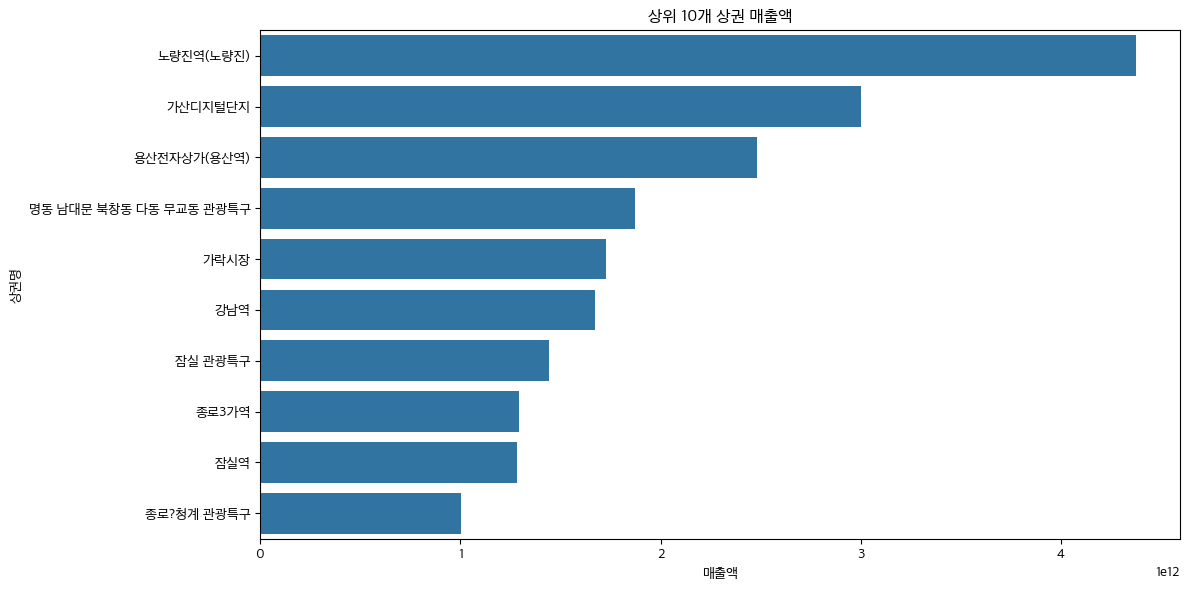

In [8]:
# 1. 상권별 매출 분석 

# 상권별 총 매출액 계산
area_sales = df.groupby(['상권_코드_명', '상권_구분_코드_명']).agg({
    '당월_매출_금액': 'sum',
    '당월_매출_건수': 'sum'
}).reset_index()
# 상권 코드명과 상권 구분 코드명 별로 데이터를 그룹화, 당월 매출 금액과 당월 매출 건수의 합계 계산 

# 1-1. 매출액 기준 상위 10개 상권 (당월 매출 금액을 기준으로 내림차순으로 정렬) 
top_sales_areas = area_sales.sort_values('당월_매출_금액', ascending=False).head(10)
print("\n매출액 기준 상위 10개 상권:")
print(top_sales_areas)

# 시각화: 상위 10개 상권 매출액
plt.figure(figsize=(12, 6))
sns.barplot(x='당월_매출_금액', y='상권_코드_명', data=top_sales_areas)
plt.title('상위 10개 상권 매출액')
plt.xlabel('매출액')
plt.ylabel('상권명')
plt.tight_layout()
plt.show() 

## 상권별 매출 - 매출액 기준 상위 10개 상권: 노량진역, 가산디지털단지, 용산전자상가, 명동, 가락시장, 강남역, 잠실 관광특구, 종로3가역, 잠실역, 종로청계 관광특구 

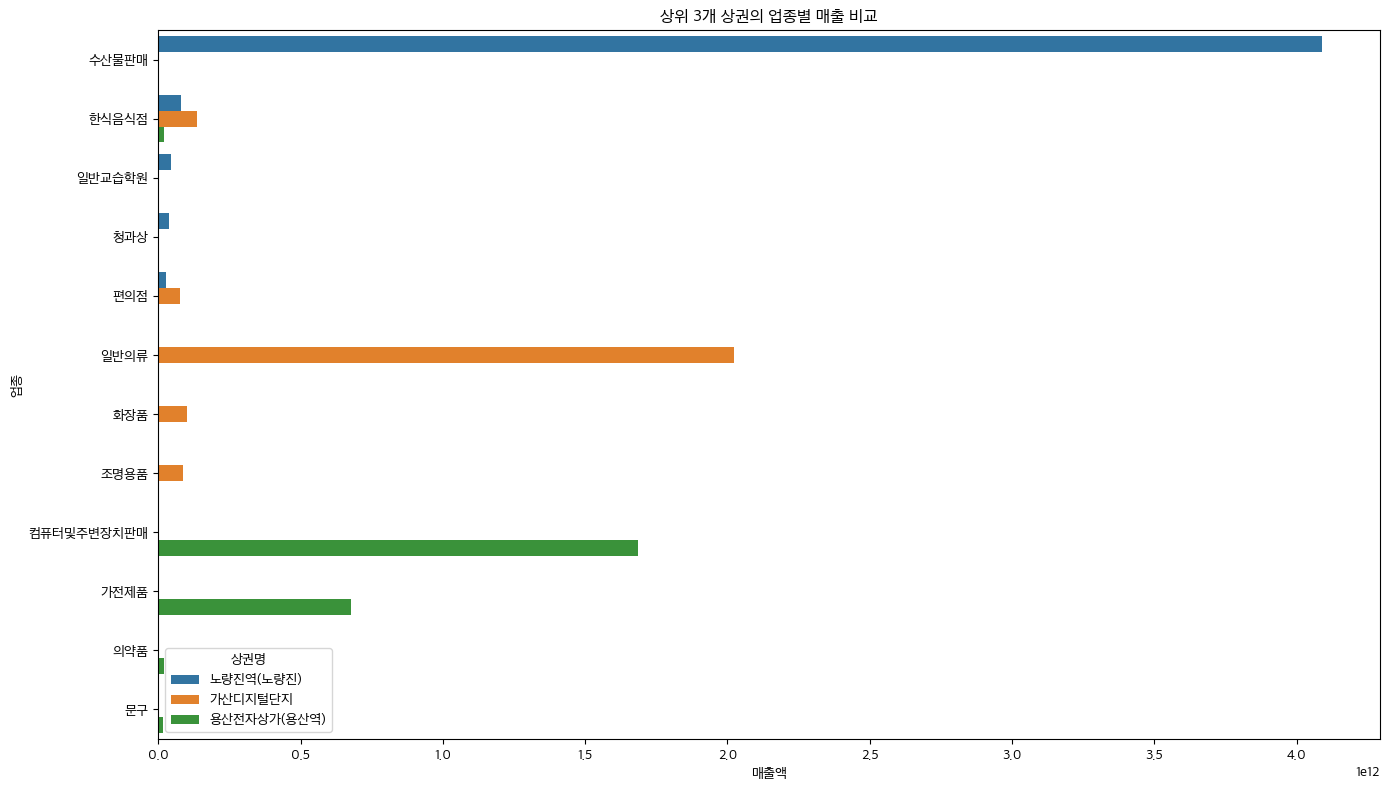

In [9]:
# 1-2. 상권별 업종 매출 분석
area_category_sales = df.groupby(['상권_코드_명', '서비스_업종_코드_명']).agg({
    '당월_매출_금액': 'sum'
}).reset_index()

# 매출액 상위 3개 상권 선택
top3_areas = top_sales_areas['상권_코드_명'].head(3).tolist()

# 상위 3개 상권의 업종별 매출 비교
top3_area_category = area_category_sales[area_category_sales['상권_코드_명'].isin(top3_areas)]

# 각 상권별로 상위 5개 업종만 선택
top_categories_by_area = []
for area in top3_areas:
    area_data = top3_area_category[top3_area_category['상권_코드_명'] == area]
    top5 = area_data.sort_values('당월_매출_금액', ascending=False).head(5)
    top_categories_by_area.append(top5)

top_categories_combined = pd.concat(top_categories_by_area)

# 시각화: 상위 3개 상권의 업종별 매출 비교
plt.figure(figsize=(14, 8))
sns.barplot(x='당월_매출_금액', y='서비스_업종_코드_명', hue='상권_코드_명', data=top_categories_combined)
plt.title('상위 3개 상권의 업종별 매출 비교')
plt.xlabel('매출액')
plt.ylabel('업종')
plt.legend(title='상권명')
plt.tight_layout()
plt.show()  

## 노량진 - 수산물 판매, 가산디지털단지 - 일반의류, 용산전자상가 - 컴퓨터및주변장치판매 업종이 매출이 제일 높음

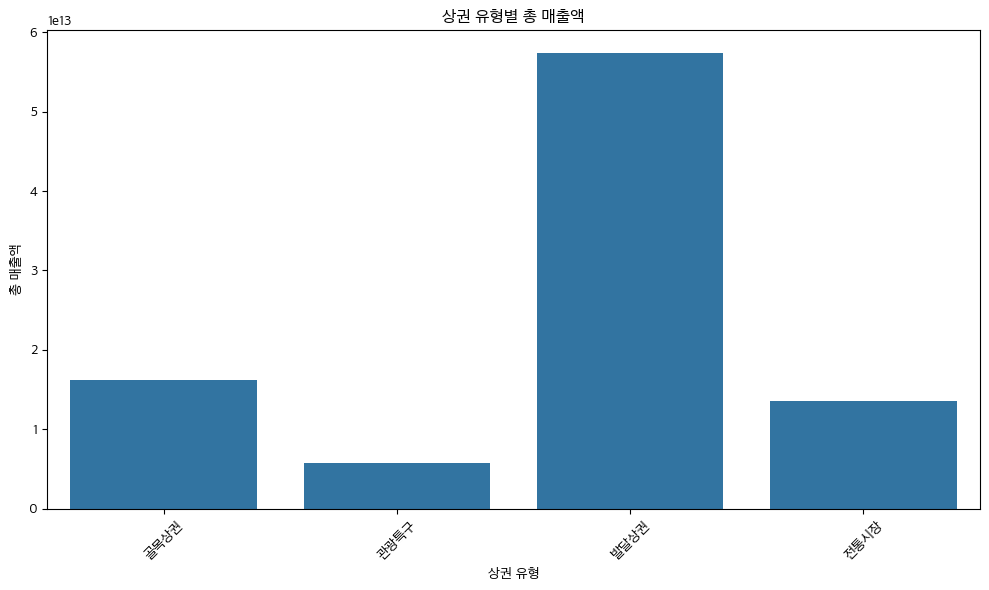

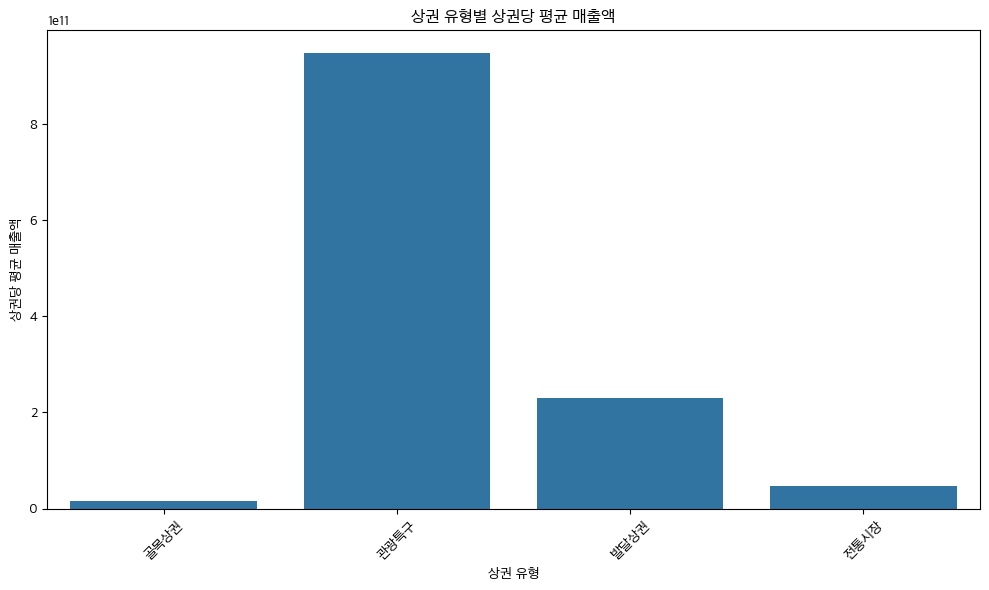

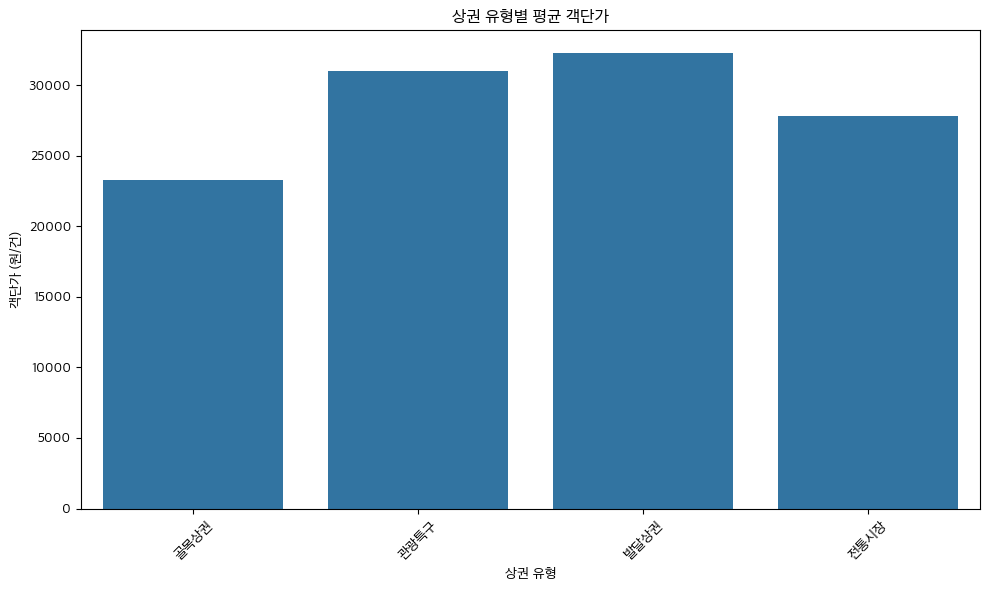

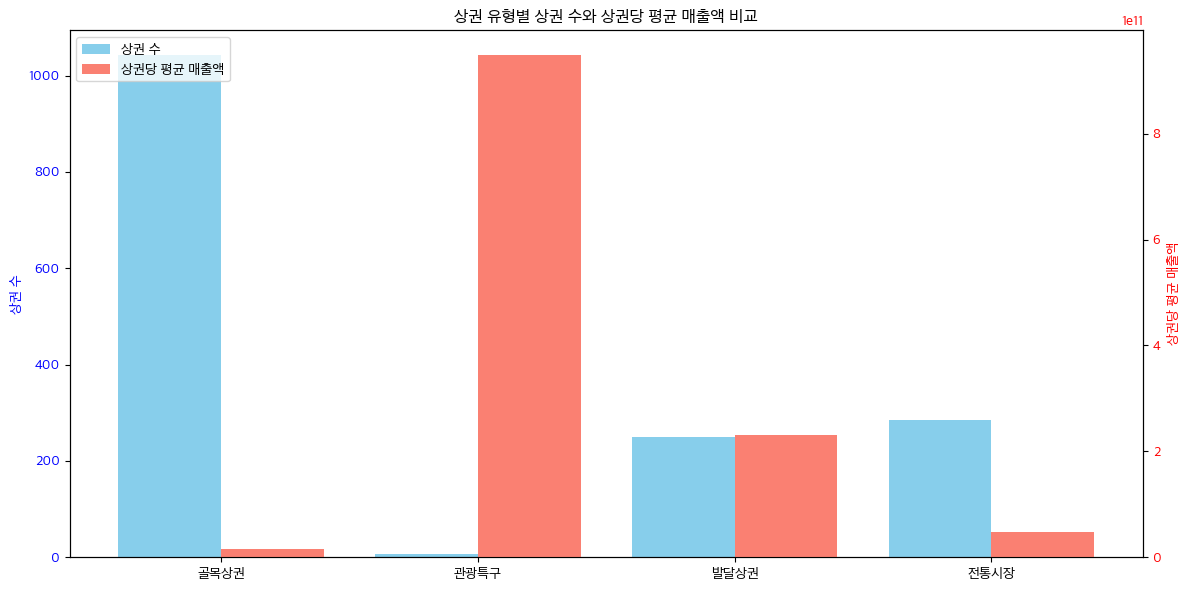

In [10]:
# 1-3. 상권 유형별 매출 분석 
# 상권 유형별 상권 수 계산
area_type_count = df.groupby('상권_구분_코드_명')['상권_코드_명'].nunique().reset_index(name='상권_수')

# 상권 유형별 총 매출액 및 매출 건수
area_type_sales = df.groupby('상권_구분_코드_명').agg({
    '당월_매출_금액': 'sum',
    '당월_매출_건수': 'sum'
}).reset_index()

# 상권 유형별 통계 데이터 병합
area_type_stats = pd.merge(area_type_sales, area_type_count, on='상권_구분_코드_명')

# 상권 유형별 상권당 평균 매출액 계산
area_type_stats['상권당_평균_매출액'] = area_type_stats['당월_매출_금액'] / area_type_stats['상권_수']

# 상권 유형별 객단가 계산
area_type_stats['객단가'] = area_type_stats['당월_매출_금액'] / area_type_stats['당월_매출_건수']

# 시각화 1: 상권 유형별 총 매출액
plt.figure(figsize=(10, 6))
sns.barplot(x='상권_구분_코드_명', y='당월_매출_금액', data=area_type_stats)
plt.title('상권 유형별 총 매출액')
plt.xlabel('상권 유형')
plt.ylabel('총 매출액')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 시각화 2: 상권 유형별 상권당 평균 매출액
plt.figure(figsize=(10, 6))
sns.barplot(x='상권_구분_코드_명', y='상권당_평균_매출액', data=area_type_stats)
plt.title('상권 유형별 상권당 평균 매출액')
plt.xlabel('상권 유형')
plt.ylabel('상권당 평균 매출액')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 시각화 3: 상권 유형별 객단가
plt.figure(figsize=(10, 6))
sns.barplot(x='상권_구분_코드_명', y='객단가', data=area_type_stats)
plt.title('상권 유형별 평균 객단가')
plt.xlabel('상권 유형')
plt.ylabel('객단가 (원/건)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 시각화 4: 상권 유형별 상권 수와 매출액 비교
fig, ax1 = plt.subplots(figsize=(12, 6))

# 상권 수 (
x = np.arange(len(area_type_stats))
ax1.bar(x - 0.2, area_type_stats['상권_수'], width=0.4, color='skyblue', label='상권 수')
ax1.set_ylabel('상권 수', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# 상권당 평균 매출액 
ax2 = ax1.twinx()
ax2.bar(x + 0.2, area_type_stats['상권당_평균_매출액'], width=0.4, color='salmon', label='상권당 평균 매출액')
ax2.set_ylabel('상권당 평균 매출액', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.xticks(x, area_type_stats['상권_구분_코드_명'], rotation=45)
plt.title('상권 유형별 상권 수와 상권당 평균 매출액 비교')
plt.tight_layout()

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.show()

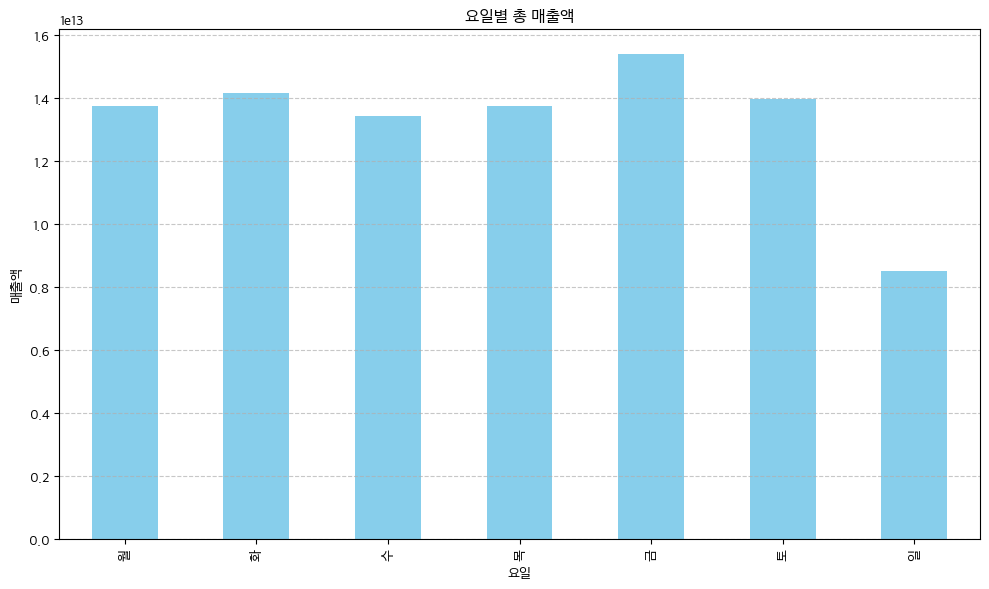

In [11]:
# 2. 시간대별 매출 패턴 분석

# 2-1. 요일별 매출 분석
weekday_cols = ['월요일_매출_금액', '화요일_매출_금액', '수요일_매출_금액', 
                '목요일_매출_금액', '금요일_매출_금액', '토요일_매출_금액', '일요일_매출_금액']

weekday_sales = df[weekday_cols].sum()
weekday_sales.index = ['월', '화', '수', '목', '금', '토', '일']

# 시각화: 요일별 매출 추이
plt.figure(figsize=(10, 6))
weekday_sales.plot(kind='bar', color='skyblue')
plt.title('요일별 총 매출액')
plt.xlabel('요일')
plt.ylabel('매출액')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()  

## 금요일이 제일 매출이 높음

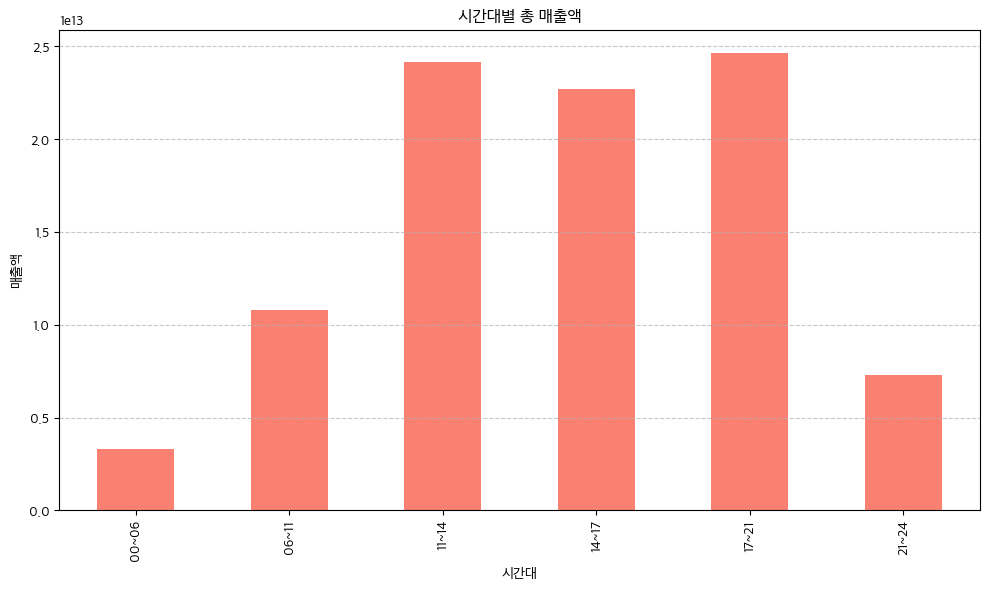

In [12]:
# 2-2. 시간대별 매출 분석
time_cols = ['시간대_00~06_매출_금액', '시간대_06~11_매출_금액', '시간대_11~14_매출_금액',
            '시간대_14~17_매출_금액', '시간대_17~21_매출_금액', '시간대_21~24_매출_금액']

time_sales = df[time_cols].sum()
time_sales.index = ['00~06', '06~11', '11~14', '14~17', '17~21', '21~24']

# 시각화: 시간대별 매출 추이
plt.figure(figsize=(10, 6))
time_sales.plot(kind='bar', color='salmon')
plt.title('시간대별 총 매출액')
plt.xlabel('시간대')
plt.ylabel('매출액')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show() 

## 17 ~ 21 사이가 매출액이 제일 높음

<Figure size 1200x800 with 0 Axes>

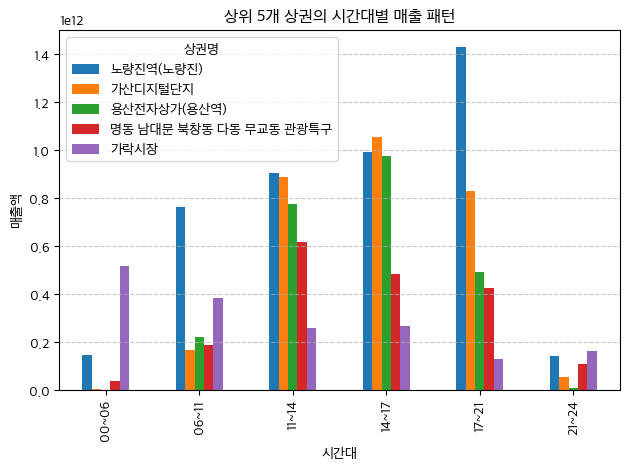

In [13]:
# 2-4. 상위 상권들의 시간대별 매출 패턴 분석
# 앞서 분석한 top_sales_areas 변수가 있다고 가정
# 상위 5개 상권만 선택
top5_areas = top_sales_areas['상권_코드_명'].head(5).tolist()
top_areas_df = df[df['상권_코드_명'].isin(top5_areas)]

# 각 상권별 시간대 매출 계산
area_time_sales = pd.DataFrame()

for area in top5_areas:
    area_data = top_areas_df[top_areas_df['상권_코드_명'] == area]
    area_time_data = area_data[time_cols].sum()
    area_time_sales[area] = area_time_data

area_time_sales.index = ['00~06', '06~11', '11~14', '14~17', '17~21', '21~24']

# 시각화: 상위 상권별 시간대 매출 패턴
plt.figure(figsize=(12, 8))
area_time_sales.plot(kind='bar')
plt.title('상위 5개 상권의 시간대별 매출 패턴')
plt.xlabel('시간대')
plt.ylabel('매출액')
plt.legend(title='상권명')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()  

# 노량진 - 17 ~ 21, 가산디지털단지 - 14 ~ 17, 용산전자상가 - 14~17, 명동 - 11 ~ 14 , 가락시장 - 00 ~ 06 매출이 높음

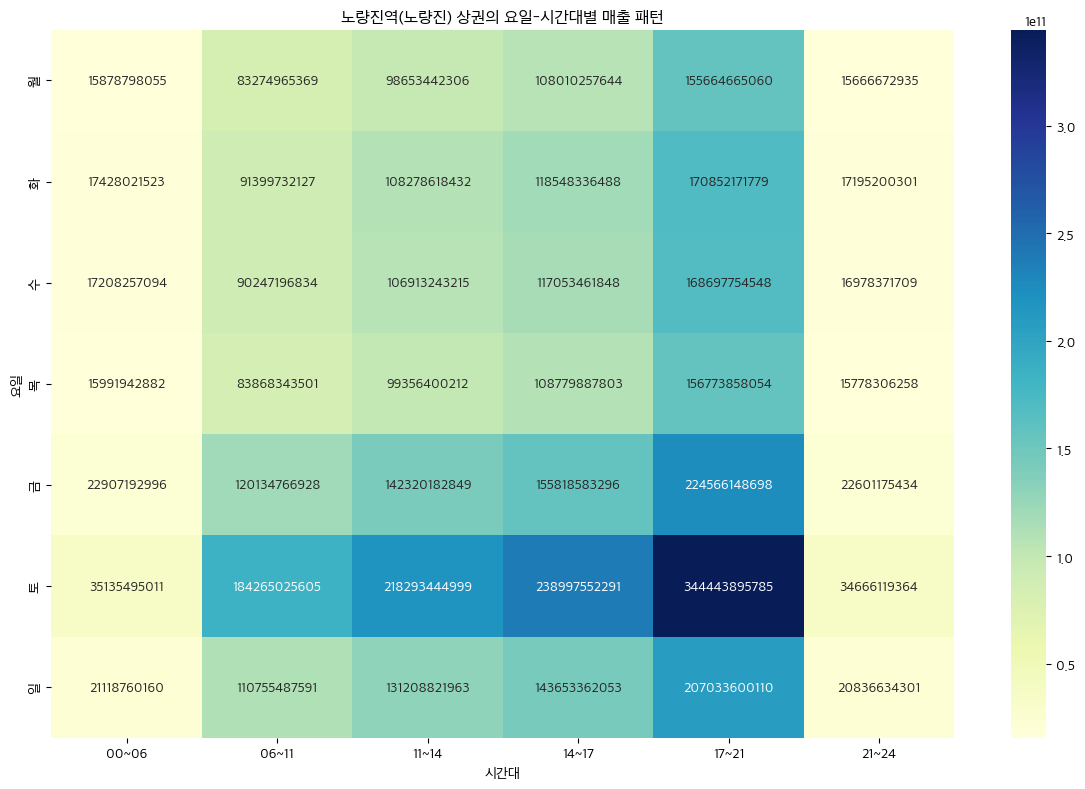

In [14]:
# 2-5. 히트맵: 상위 상권의 요일-시간대별 매출 패턴 (첫 번째 상권 기준)
top_area = top5_areas[0]
top_area_df = df[df['상권_코드_명'] == top_area]

weekday_time_data = []
for i, day in enumerate(['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일']):
    day_data = []
    for time in ['00~06', '06~11', '11~14', '14~17', '17~21', '21~24']:
        # 해당 데이터가 없는 경우 추정
        if f'{day}_시간대_{time}_매출_금액' in top_area_df.columns:
            value = top_area_df[f'{day}_시간대_{time}_매출_금액'].sum()
        else:
            # 해당 컬럼이 없으면 전체 요일 매출과 시간대 매출의 비율로 추정
            day_total = top_area_df[f'{day}_매출_금액'].sum()
            time_ratio = top_area_df[f'시간대_{time}_매출_금액'].sum() / top_area_df['당월_매출_금액'].sum()
            value = day_total * time_ratio
        day_data.append(value)
    weekday_time_data.append(day_data)

# 히트맵 데이터 생성
heatmap_df = pd.DataFrame(weekday_time_data, 
                          index=['월', '화', '수', '목', '금', '토', '일'],
                          columns=['00~06', '06~11', '11~14', '14~17', '17~21', '21~24'])

# 시각화: 요일-시간대별 매출 히트맵
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_df, annot=True, cmap='YlGnBu', fmt='.0f')
plt.title(f'{top_area} 상권의 요일-시간대별 매출 패턴')
plt.xlabel('시간대')
plt.ylabel('요일')
plt.tight_layout()
plt.show()

## 노량진에서는 토요일 17 ~21 가 제일 매출이 높음 

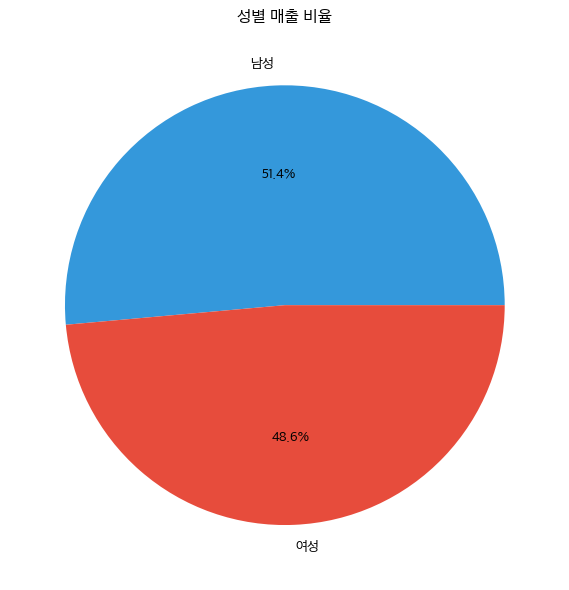

In [15]:
# 3. 고객 특성별 매출 분석

# 3-1. 성별 매출 비교
gender_sales = pd.Series({
    '남성': df['남성_매출_금액'].sum(),
    '여성': df['여성_매출_금액'].sum()
})

# 시각화: 성별 매출 비율
plt.figure(figsize=(8, 6))
gender_sales.plot(kind='pie', autopct='%1.1f%%', colors=['#3498db', '#e74c3c'])
plt.title('성별 매출 비율')
plt.ylabel('')
plt.tight_layout()
plt.show()

## 남성이 더 높음

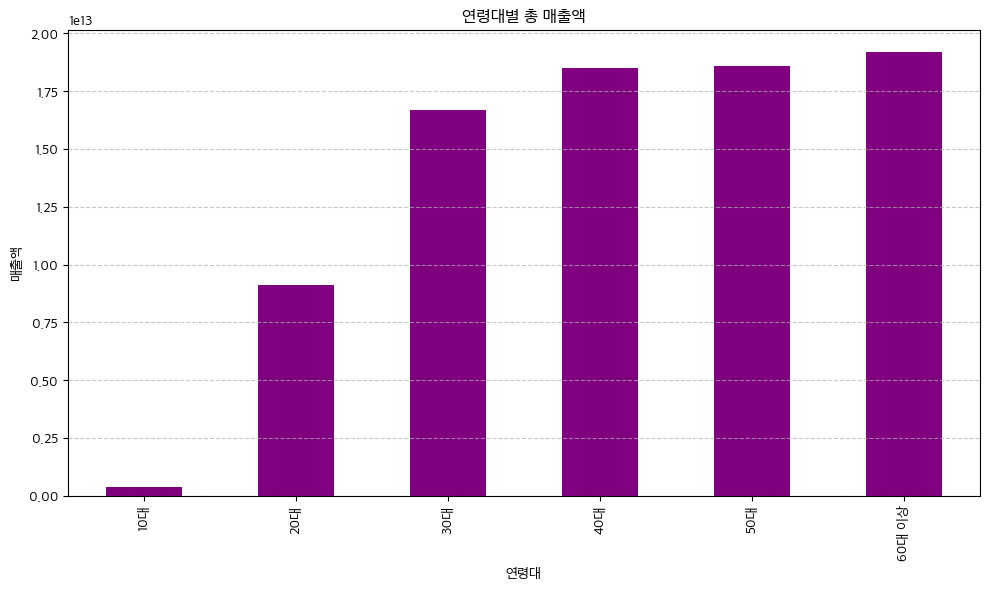

In [16]:
# 3-2. 연령대별 매출 분석
age_cols = ['연령대_10_매출_금액', '연령대_20_매출_금액', '연령대_30_매출_금액', 
            '연령대_40_매출_금액', '연령대_50_매출_금액', '연령대_60_이상_매출_금액']
age_sales = df[age_cols].sum()
age_sales.index = ['10대', '20대', '30대', '40대', '50대', '60대 이상']

# 시각화: 연령대별 매출액
plt.figure(figsize=(10, 6))
age_sales.plot(kind='bar', color='purple')
plt.title('연령대별 총 매출액')
plt.xlabel('연령대')
plt.ylabel('매출액')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 60대 이상이 제일 높음

<Figure size 1200x600 with 0 Axes>

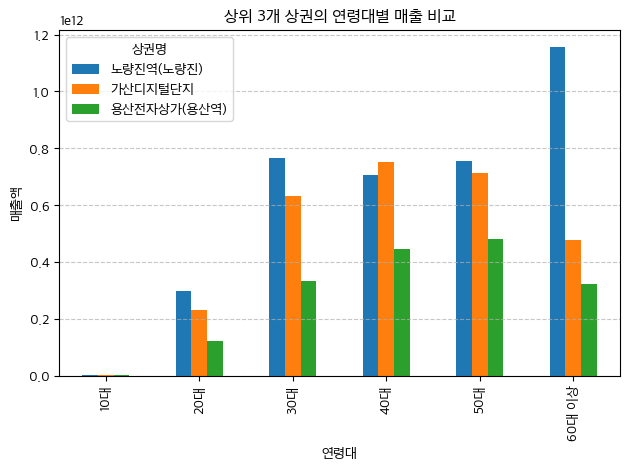

In [17]:
# 3-3. 상위 3개 상권의 연령대별 매출 비교
top3_areas_df = df[df['상권_코드_명'].isin(top3_areas)]
age_by_area = pd.DataFrame()

for area in top3_areas:
    area_data = df[df['상권_코드_명'] == area]
    age_by_area[area] = area_data[age_cols].sum().values

age_by_area.index = ['10대', '20대', '30대', '40대', '50대', '60대 이상']

# 시각화: 상위 3개 상권의 연령대별 매출 비교
plt.figure(figsize=(12, 6))
age_by_area.plot(kind='bar')
plt.title('상위 3개 상권의 연령대별 매출 비교')
plt.xlabel('연령대')
plt.ylabel('매출액')
plt.legend(title='상권명')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 노량진: 60대 이상, 가산디지털단지: 40대, 용산전자상가: 50대 연령대에서 매출이 높게 나옴

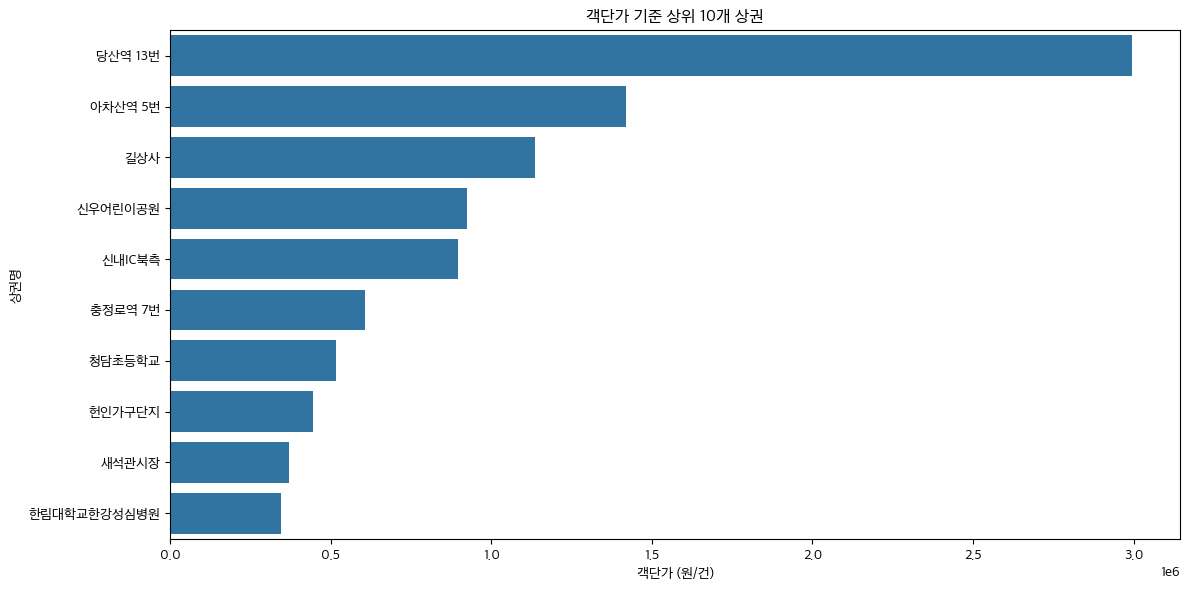

In [18]:
# 4. 매출 추가 분석

# 4-1. 건당 평균 매출액 분석
area_efficiency = area_sales.copy()
area_efficiency['객단가'] = area_efficiency['당월_매출_금액'] / area_efficiency['당월_매출_건수']
top10_efficiency = area_efficiency.sort_values('객단가', ascending=False).head(10)

# 시각화: 객단가 기준 상위 10개 상권
plt.figure(figsize=(12, 6))
sns.barplot(x='객단가', y='상권_코드_명', data=top10_efficiency)
plt.title('객단가 기준 상위 10개 상권')
plt.xlabel('객단가 (원/건)')
plt.ylabel('상권명')
plt.tight_layout()
plt.show()

## 당산역 13번이 객단가 기준 제일 높음

<Figure size 1000x600 with 0 Axes>

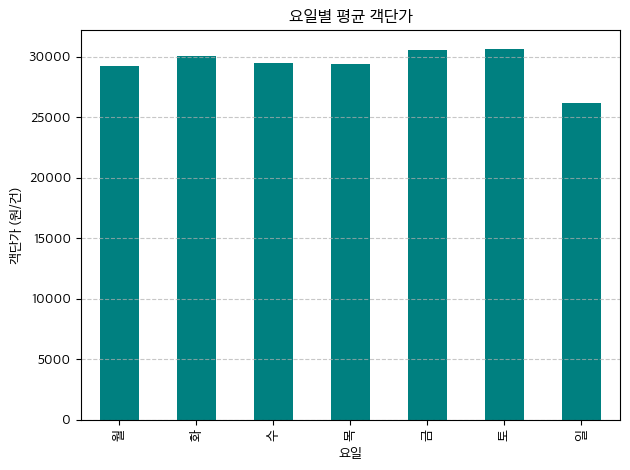

In [19]:
# 4-2. 요일별 객단가 분석
weekday_transactions = ['월요일_매출_건수', '화요일_매출_건수', '수요일_매출_건수', 
                       '목요일_매출_건수', '금요일_매출_건수', '토요일_매출_건수', '일요일_매출_건수']
weekday_amount = weekday_cols
weekday_efficiency = pd.DataFrame()

for i, day in enumerate(['월', '화', '수', '목', '금', '토', '일']):
    weekday_efficiency[day] = [df[weekday_amount[i]].sum() / df[weekday_transactions[i]].sum()]

# 시각화: 요일별 객단가
plt.figure(figsize=(10, 6))
weekday_efficiency.T.plot(kind='bar', legend=False, color='teal')
plt.title('요일별 평균 객단가')
plt.xlabel('요일')
plt.ylabel('객단가 (원/건)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 요일별 평균 객단가는 금요일, 토요일이 높다

   서비스_업종_코드_명       당월_매출_금액  당월_매출_건수
0          PC방   178380067707  33062308
1           가구   509465906955   1261402
2           가방   266291164112   7629627
3         가전제품   920565656060   2349055
4       가전제품수리    24750048846    450474
..         ...            ...       ...
57         한의원   704581639656  17024657
58         핸드폰   296235051582   8545652
59     호프-간이주점  3173227453876  67897098
60         화장품  1409393266038  16622801
61          화초   209189348736   4662731

[62 rows x 3 columns]


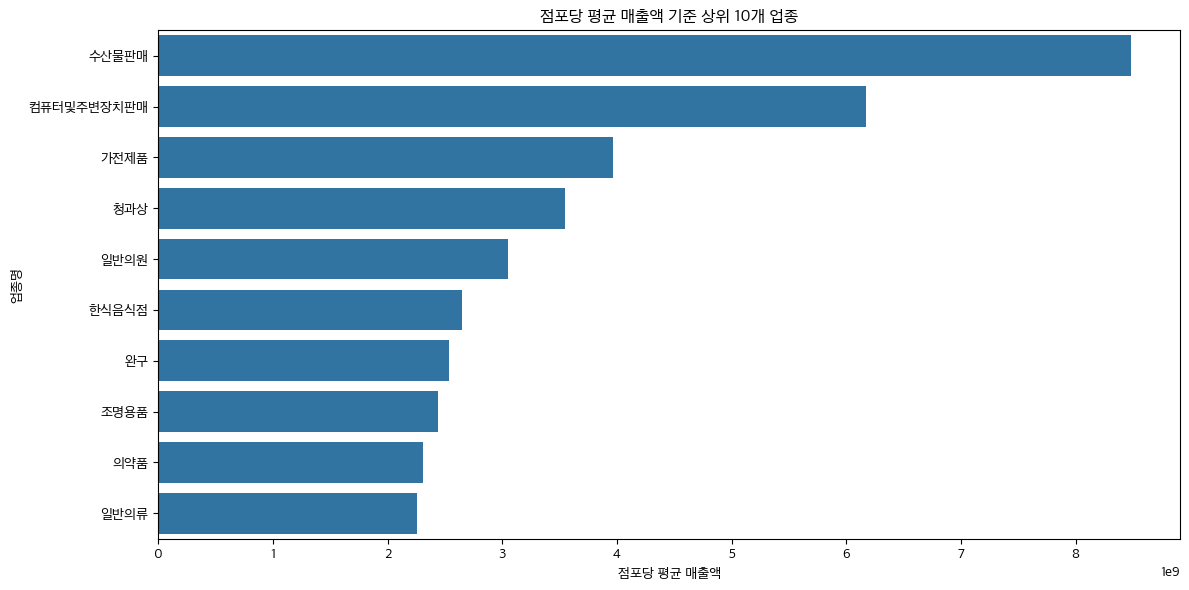

In [20]:
# 5. 업종별 분석 

category_count = df.groupby('서비스_업종_코드_명').size().reset_index(name='점포수')

# 5-1. 업종별 총 매출액 및 매출 건수
category_sales = df.groupby('서비스_업종_코드_명').agg({
    '당월_매출_금액': 'sum',
    '당월_매출_건수': 'sum'
}).reset_index()

print(category_sales)

category_stats = pd.merge(category_sales, category_count, on='서비스_업종_코드_명')

# 5-2. 업종별 점포당 평균 매출액 및 객단가 계산
category_stats['점포당_평균_매출액'] = category_stats['당월_매출_금액'] / category_stats['점포수']
category_stats['객단가'] = category_stats['당월_매출_금액'] / category_stats['당월_매출_건수']

# 시각화 1: 점포당 평균 매출액 기준 상위 10개 업종
top_avg_categories = category_stats.sort_values('점포당_평균_매출액', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='점포당_평균_매출액', y='서비스_업종_코드_명', data=top_avg_categories)
plt.title('점포당 평균 매출액 기준 상위 10개 업종')
plt.xlabel('점포당 평균 매출액')
plt.ylabel('업종명')
plt.tight_layout()
plt.show()

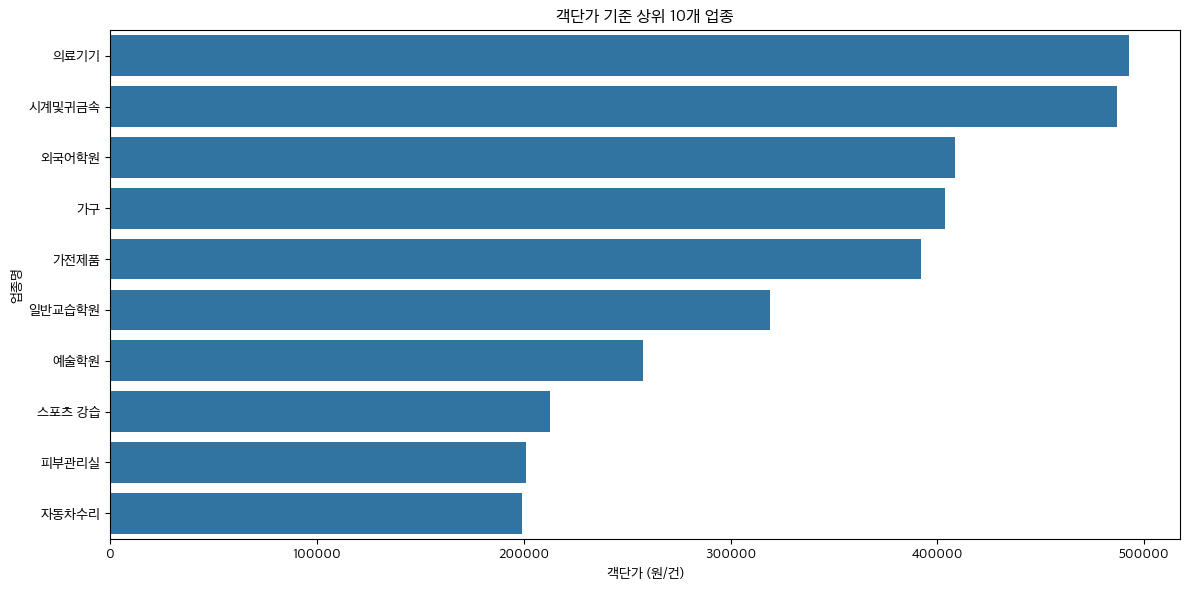

In [21]:
# 시각화 2: 객단가 기준 상위 10개 업종
top_per_transaction = category_stats.sort_values('객단가', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='객단가', y='서비스_업종_코드_명', data=top_per_transaction)
plt.title('객단가 기준 상위 10개 업종')
plt.xlabel('객단가 (원/건)')
plt.ylabel('업종명')
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

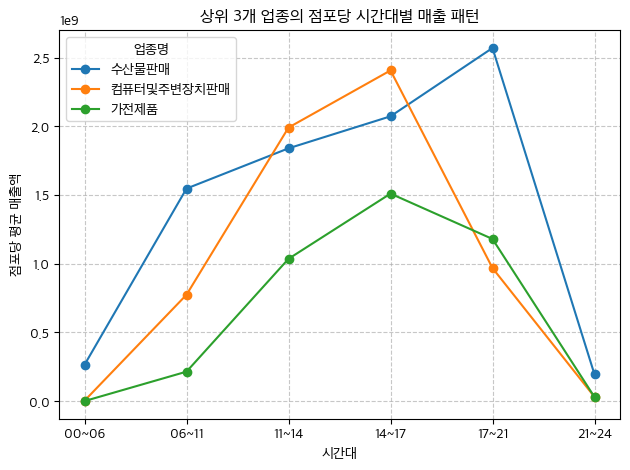

In [22]:
# 5-3. 상위 3개 업종(점포당 매출액 기준)의 시간대별 매출 패턴
top3_categories = top_avg_categories['서비스_업종_코드_명'].head(3).tolist()
top_cat_df = df[df['서비스_업종_코드_명'].isin(top3_categories)]

time_by_category = pd.DataFrame()
for category in top3_categories:
    cat_data = top_cat_df[top_cat_df['서비스_업종_코드_명'] == category]

    category_store_count = category_count[category_count['서비스_업종_코드_명'] == category]['점포수'].values[0]
    time_by_category[category] = cat_data[time_cols].sum().values / category_store_count

time_by_category.index = ['00~06', '06~11', '11~14', '14~17', '17~21', '21~24']

# 시각화 3: 상위 3개 업종의 점포당 시간대별 매출 패턴
plt.figure(figsize=(12, 6))
time_by_category.plot(kind='line', marker='o')
plt.title('상위 3개 업종의 점포당 시간대별 매출 패턴')
plt.xlabel('시간대')
plt.ylabel('점포당 평균 매출액')
plt.legend(title='업종명')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

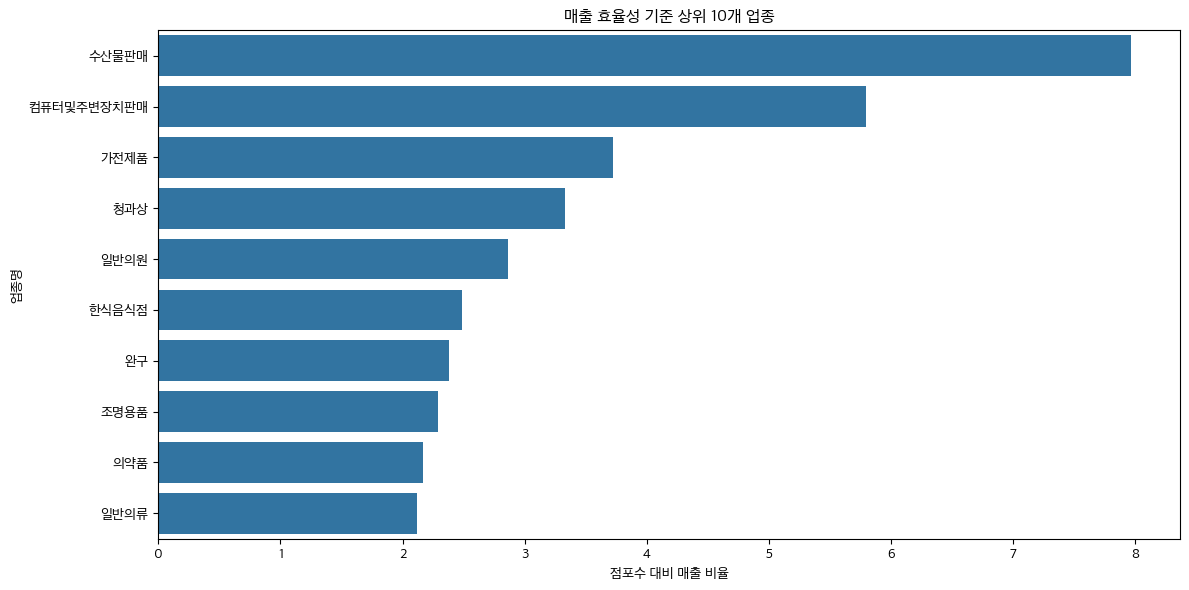

In [23]:
# 5-4. 점포수 대비 매출액 비율 

# 전체 점포수 대비 각 업종의 점포수 비율
category_stats['점포수_비율'] = category_stats['점포수'] / category_stats['점포수'].sum()
# 전체 매출액 대비 각 업종의 매출액 비율
category_stats['매출액_비율'] = category_stats['당월_매출_금액'] / category_stats['당월_매출_금액'].sum()
# 매출 효율성 = 매출액 비율 / 점포수 비율
category_stats['매출_효율성'] = category_stats['매출액_비율'] / category_stats['점포수_비율']

# 시각화 4: 매출 효율성 기준 상위 10개 업종
top_efficiency = category_stats.sort_values('매출_효율성', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='매출_효율성', y='서비스_업종_코드_명', data=top_efficiency)
plt.title('매출 효율성 기준 상위 10개 업종')
plt.xlabel('점포수 대비 매출 비율')
plt.ylabel('업종명')
plt.tight_layout()
plt.show()

<Figure size 1400x800 with 0 Axes>

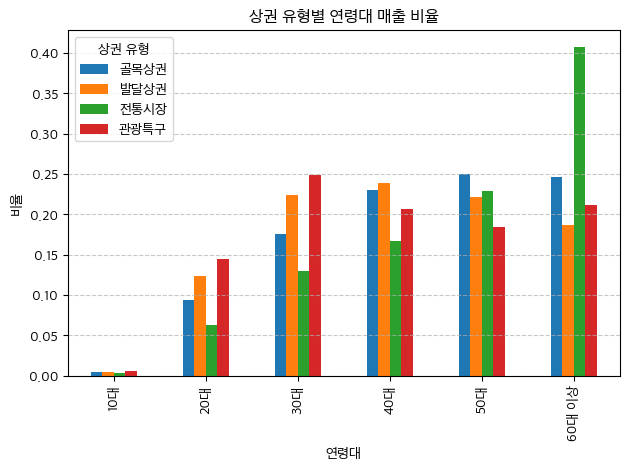

In [24]:
# 6. 상권 유형별 주요 고객층 분석

area_type_age = pd.DataFrame()
area_types = df['상권_구분_코드_명'].unique()

for area_type in area_types:
    type_data = df[df['상권_구분_코드_명'] == area_type]
    area_type_age[area_type] = type_data[age_cols].sum().values / type_data[age_cols].sum().sum()

area_type_age.index = ['10대', '20대', '30대', '40대', '50대', '60대 이상']

# 시각화: 상권 유형별 연령대 비율
plt.figure(figsize=(14, 8))
area_type_age.plot(kind='bar')
plt.title('상권 유형별 연령대 매출 비율')
plt.xlabel('연령대')
plt.ylabel('비율')
plt.legend(title='상권 유형')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [25]:
# 2024 서울시 상권 분석 서비스 (추정매출 - 행정동) 데이터

df2 = pd.read_csv('서울시 상권분석서비스(추정매출-행정동).csv',encoding="EUC-KR")

df2.head()

,기준_년분기_코드,행정동_코드,행정동_코드_명,서비스_업종_코드,서비스_업종_코드_명,당월_매출_금액,당월_매출_건수,주중_매출_금액,주말_매출_금액,월요일_매출_금액,...,시간대_건수~21_매출_건수,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수
0,20241,11110515,청운효자동,CS100001,한식음식점,3282036149,102492,2359720647,922315502,381912382,...,25725,1622,49367,41053,470,12429,22034,18544,19637,17313
1,20241,11110515,청운효자동,CS100003,일식음식점,315907116,11835,225051104,90856012,26359701,...,2683,161,4925,6023,204,3395,2772,1733,1966,879
2,20241,11110515,청운효자동,CS100004,양식음식점,2582745698,49217,1540711320,1042034378,148589304,...,16503,2787,14393,32370,233,13771,14934,7816,6618,3394
3,20241,11110515,청운효자동,CS100005,제과점,548138245,41460,335822266,212315979,48215205,...,11458,351,13280,26768,216,8425,10838,7637,7641,5291
4,20241,11110515,청운효자동,CS100007,치킨전문점,78178614,2965,48075887,30102727,6755318,...,1889,496,1467,1406,24,303,667,593,747,537


In [26]:
# 결측치 확인

print(df2.isnull().sum())

기준_년분기_코드          0
행정동_코드             0
행정동_코드_명           0
서비스_업종_코드          0
서비스_업종_코드_명        0
당월_매출_금액           0
당월_매출_건수           0
주중_매출_금액           0
주말_매출_금액           0
월요일_매출_금액          0
화요일_매출_금액          0
수요일_매출_금액          0
목요일_매출_금액          0
금요일_매출_금액          0
토요일_매출_금액          0
일요일_매출_금액          0
시간대_00~06_매출_금액    0
시간대_06~11_매출_금액    0
시간대_11~14_매출_금액    0
시간대_14~17_매출_금액    0
시간대_17~21_매출_금액    0
시간대_21~24_매출_금액    0
남성_매출_금액           0
여성_매출_금액           0
연령대_10_매출_금액       0
연령대_20_매출_금액       0
연령대_30_매출_금액       0
연령대_40_매출_금액       0
연령대_50_매출_금액       0
연령대_60_이상_매출_금액    0
주중_매출_건수           0
주말_매출_건수           0
월요일_매출_건수          0
화요일_매출_건수          0
수요일_매출_건수          0
목요일_매출_건수          0
금요일_매출_건수          0
토요일_매출_건수          0
일요일_매출_건수          0
시간대_건수~06_매출_건수    0
시간대_건수~11_매출_건수    0
시간대_건수~14_매출_건수    0
시간대_건수~17_매출_건수    0
시간대_건수~21_매출_건수    0
시간대_건수~24_매출_건수    0
남성_매출_건수           0
여성_매출_건수           0
연령대_10_매출_건수 

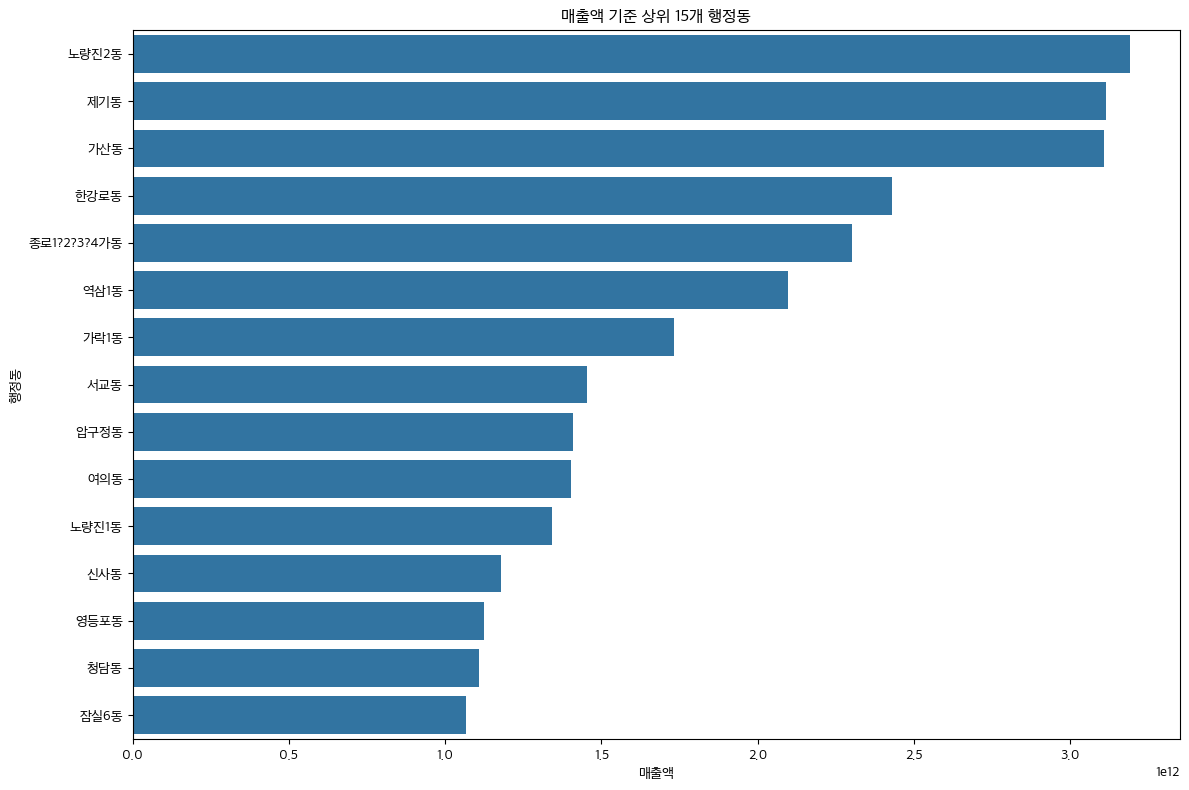

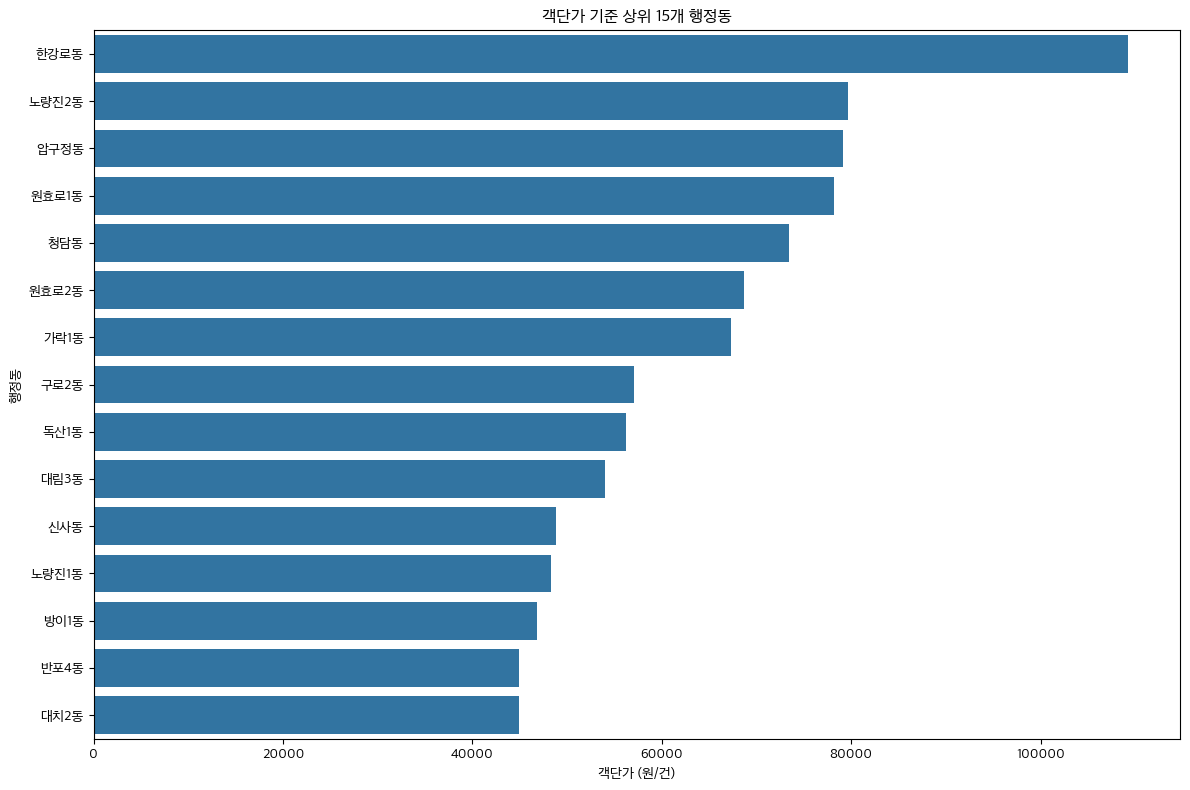

In [27]:
# 행정동별 총 매출액 및 매출 건수 분석

dong_sales = df2.groupby(['행정동_코드_명']).agg({
    '당월_매출_금액': 'sum',
    '당월_매출_건수': 'sum'
}).reset_index()

# 행정동별 객단가 계산
dong_sales['객단가'] = dong_sales['당월_매출_금액'] / dong_sales['당월_매출_건수']

# 매출액 기준 상위 15개 행정동
top_dong_sales = dong_sales.sort_values('당월_매출_금액', ascending=False).head(15)

# 시각화: 매출액 기준 상위 15개 행정동
plt.figure(figsize=(12, 8))
sns.barplot(x='당월_매출_금액', y='행정동_코드_명', data=top_dong_sales)
plt.title('매출액 기준 상위 15개 행정동')
plt.xlabel('매출액')
plt.ylabel('행정동')
plt.tight_layout()
plt.show()

# 객단가 기준 상위 15개 행정동
top_dong_avg = dong_sales.sort_values('객단가', ascending=False).head(15)

# 시각화: 객단가 기준 상위 15개 행정동
plt.figure(figsize=(12, 8))
sns.barplot(x='객단가', y='행정동_코드_명', data=top_dong_avg)
plt.title('객단가 기준 상위 15개 행정동')
plt.xlabel('객단가 (원/건)')
plt.ylabel('행정동')
plt.tight_layout()
plt.show()

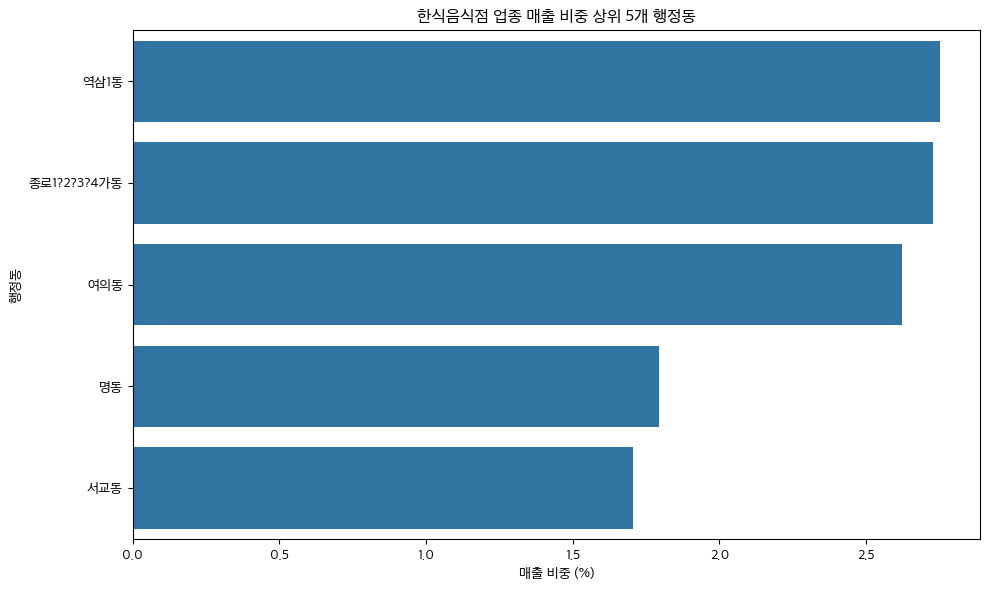

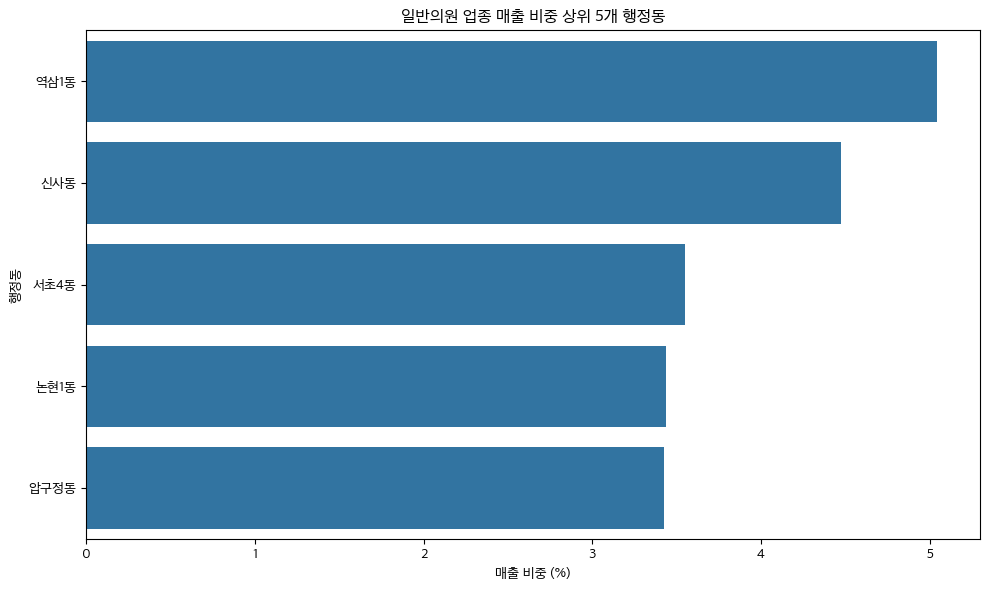

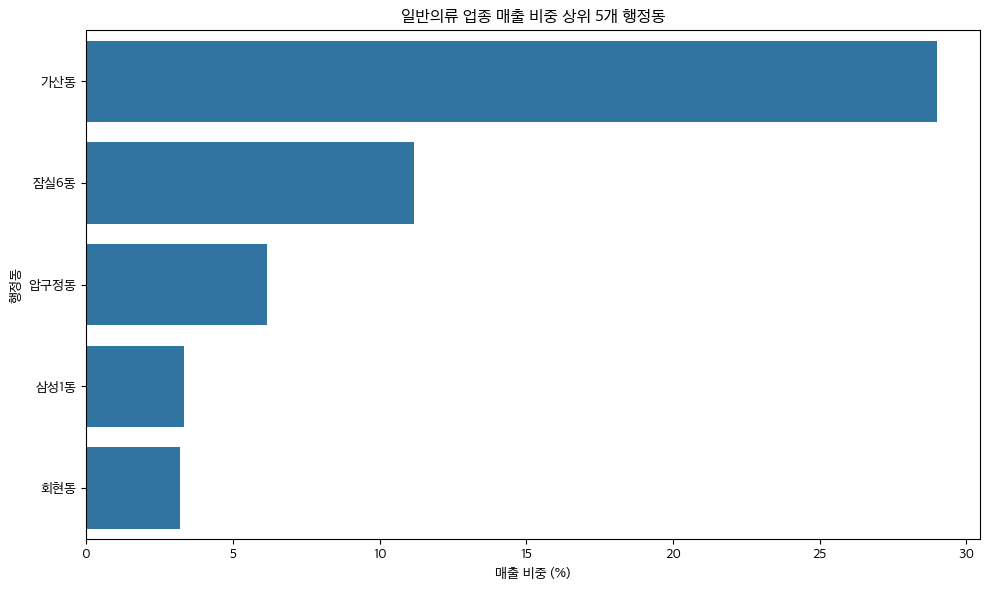

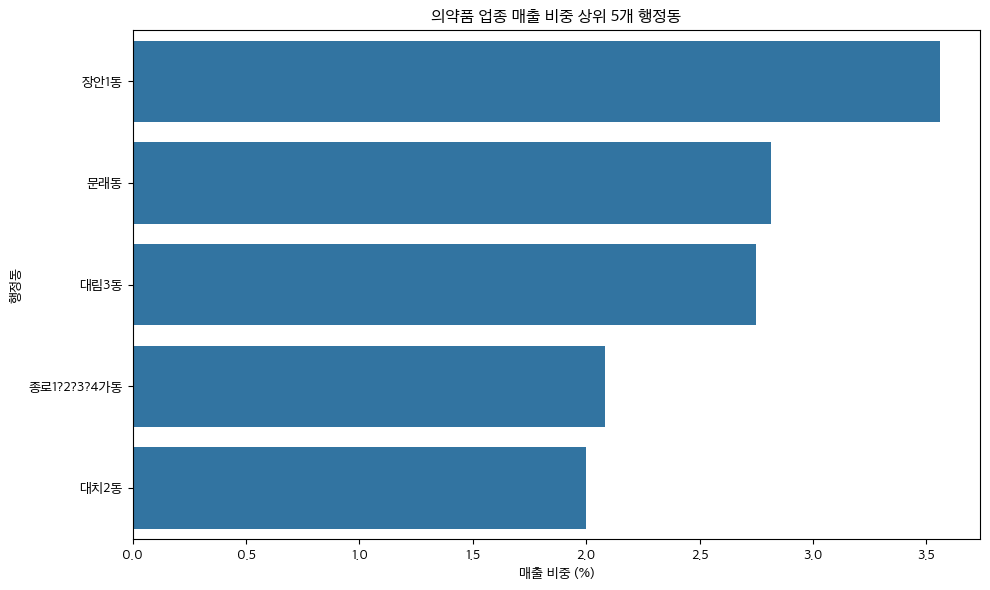

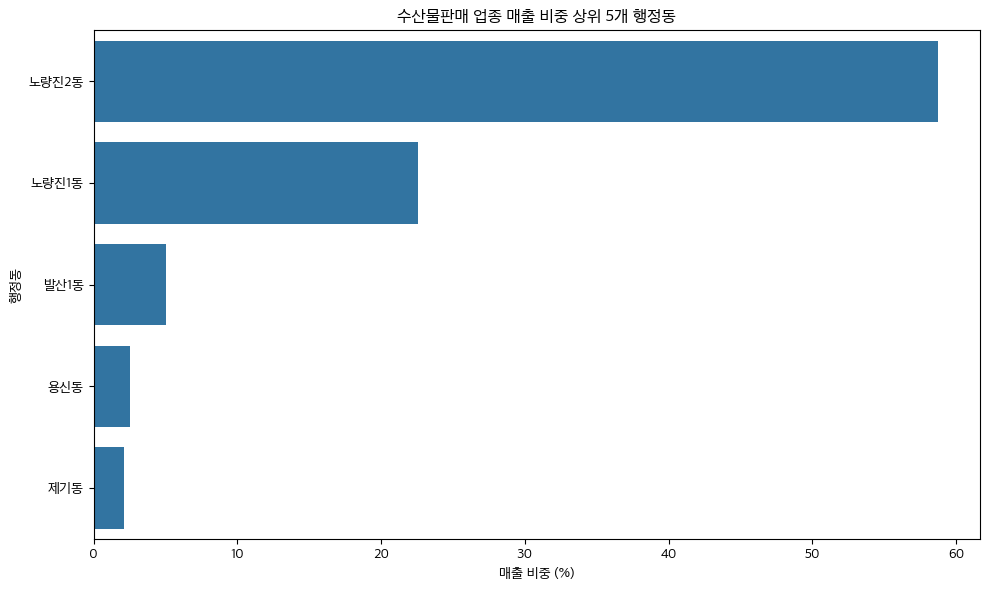

In [120]:
# 업종별 행정동 매출 비중 분석
industry_dong = df2.groupby(['서비스_업종_코드_명', '행정동_코드_명']).agg({
    '당월_매출_금액': 'sum'
}).reset_index()

# 업종별 전체 매출액 계산
industry_total = industry_dong.groupby('서비스_업종_코드_명')['당월_매출_금액'].sum().reset_index(name='업종_총매출액')

# 업종별 행정동 매출 데이터 병합
industry_dong = pd.merge(industry_dong, industry_total, on='서비스_업종_코드_명')

# 매출 비중 계산
industry_dong['매출_비중'] = industry_dong['당월_매출_금액'] / industry_dong['업종_총매출액'] * 100

# 상위 5개 업종 선택
top_industries = industry_total.sort_values('업종_총매출액', ascending=False).head(5)['서비스_업종_코드_명'].tolist()

# 각 업종별 매출 비중 상위 5개 행정동 조회
for industry in top_industries:
    industry_data = industry_dong[industry_dong['서비스_업종_코드_명'] == industry]
    top_dongs = industry_data.sort_values('매출_비중', ascending=False).head(5)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='매출_비중', y='행정동_코드_명', data=top_dongs)
    plt.title(f'{industry} 업종 매출 비중 상위 5개 행정동')
    plt.xlabel('매출 비중 (%)')
    plt.ylabel('행정동')
    plt.tight_layout()
    plt.show()

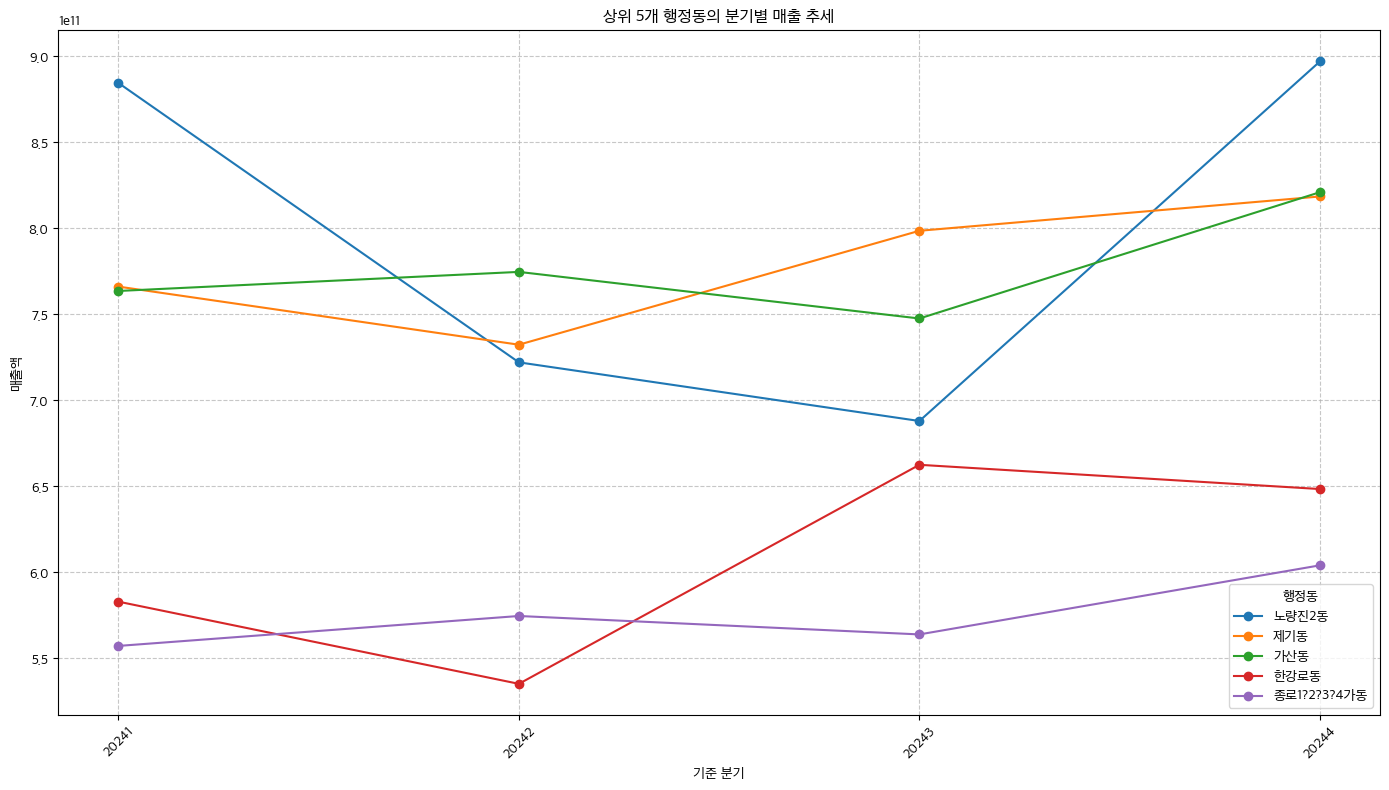

In [28]:
# 분기별 행정동 매출 추세 분석
quarter_dong = df2.groupby(['기준_년분기_코드', '행정동_코드_명']).agg({
    '당월_매출_금액': 'sum'
}).reset_index()

quarter_dong['기준_년분기_코드'] = quarter_dong['기준_년분기_코드'].astype(str)


quarter_dong['년도'] = quarter_dong['기준_년분기_코드'].str[:4].astype(int)
quarter_dong['분기'] = quarter_dong['기준_년분기_코드'].str[4:].astype(int)

# 각 분기의 중간 월로 날짜 생성 (1분기=2월, 2분기=5월, 3분기=8월, 4분기=11월)
quarter_dong['날짜'] = pd.to_datetime(
    quarter_dong['년도'].astype(str) + '-' + 
    ((quarter_dong['분기'] * 3 - 1).astype(str)) + '-15'
)

# 날짜 기준으로 정렬
quarter_dong = quarter_dong.sort_values('날짜')

# 매출액 기준 상위 5개 행정동 선택
top_dongs_overall = df2.groupby('행정동_코드_명')['당월_매출_금액'].sum().nlargest(5).index.tolist()


plt.figure(figsize=(14, 8))
quarter_dong_simple = df2.groupby(['기준_년분기_코드', '행정동_코드_명']).agg({
    '당월_매출_금액': 'sum'
}).reset_index()

# 기준_년분기_코드를 기준으로 정렬
quarter_dong_simple['기준_년분기_코드'] = quarter_dong_simple['기준_년분기_코드'].astype(str)
quarter_dong_simple = quarter_dong_simple.sort_values('기준_년분기_코드')

for dong in top_dongs_overall:
    dong_data = quarter_dong_simple[quarter_dong_simple['행정동_코드_명'] == dong]
    plt.plot(dong_data['기준_년분기_코드'], dong_data['당월_매출_금액'], marker='o', label=dong)

plt.title('상위 5개 행정동의 분기별 매출 추세')
plt.xlabel('기준 분기')
plt.ylabel('매출액')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='행정동')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()